In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split 

Using TensorFlow backend.


In [2]:
data = pd.read_csv("creditcard\creditcard.csv")

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


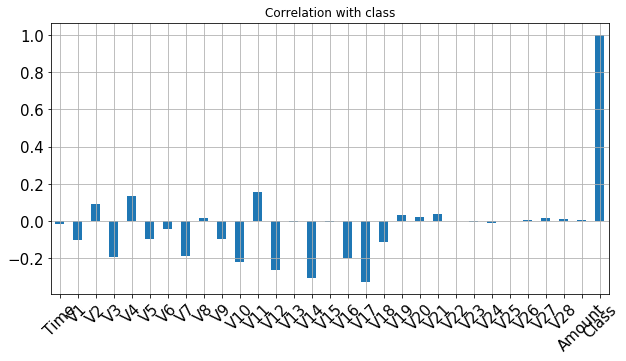

In [5]:
data.corrwith(data.Class).plot.bar(figsize = (10, 5), title = "Correlation with class", fontsize = 15, rot = 45, grid = True)

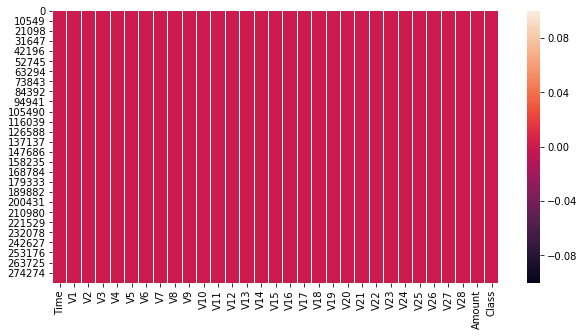

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull())

In [7]:
data.shape

(284807, 31)

In [8]:
data.isnull().values.sum()

0

In [9]:
from sklearn.preprocessing import StandardScaler
data['standarsised Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'standarsised Amount'],
      dtype='object')

In [11]:
data = data.drop(['Amount'], axis = 1)
data = data.drop(['Time'], axis = 1)

In [12]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'standarsised Amount'],
      dtype='object')

In [13]:
X = data.drop(['Class'], axis =1)
y = data['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(15, activation ='relu', input_dim = 29))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
199364/199364 [==============================] - 16s 78us/step - loss: 0.0083 - acc: 0.9991
Epoch 2/100
199364/199364 [==============================] - 11s 55us/step - loss: 0.0031 - acc: 0.9993
Epoch 3/100
199364/199364 [==============================] - 12s 58us/step - loss: 0.0028 - acc: 0.9994
Epoch 4/100
199364/199364 [==============================] - 10s 52us/step - loss: 0.0026 - acc: 0.9994
Epoch 5/100
199364/199364 [==============================] - 11s 54us/step - loss: 0.0024 - acc: 0.9994
Epoch 6/100
199364/199364 [==============================] - 11s 54us/step - loss: 0.0025 - acc: 0.9995
Epoch 7/100
199364/199364 [==============================] - 10s 53us/step - loss: 0.0023 - acc: 0.9995
Epoch 8/100
199364/199364 [==============================] - 10s 52us/step - loss: 0.0022 - acc: 0.9995
Epoch 9/100
199364/199364 [==============================] - 10s 52us/step - loss: 0.0021 - acc: 0.9995
Epoch 10/100
199

199364/199364 [==============================] - 10s 50us/step - loss: 0.0011 - acc: 0.9997
Epoch 77/100
199364/199364 [==============================] - 10s 51us/step - loss: 0.0010 - acc: 0.9997
Epoch 78/100
199364/199364 [==============================] - 11s 53us/step - loss: 9.3836e-04 - acc: 0.9997
Epoch 79/100
199364/199364 [==============================] - 10s 53us/step - loss: 9.8722e-04 - acc: 0.9997
Epoch 80/100
199364/199364 [==============================] - 11s 55us/step - loss: 9.6511e-04 - acc: 0.9997
Epoch 81/100
199364/199364 [==============================] - 11s 54us/step - loss: 8.6633e-04 - acc: 0.9998
Epoch 82/100
199364/199364 [==============================] - 11s 54us/step - loss: 0.0011 - acc: 0.9997
Epoch 83/100
199364/199364 [==============================] - 10s 49us/step - loss: 8.9836e-04 - acc: 0.9997
Epoch 84/100
199364/199364 [==============================] - 10s 51us/step - loss: 9.7241e-04 - acc: 0.9997
Epoch 85/100
199364/199364 [================

In [19]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
score = model.evaluate(X_test, y_test)
score

85443/85443 [==============================] - 4s 42us/step


[0.006249599457806327, 0.99916903666772]

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[85262,    34],
       [   37,   110]], dtype=int64)